# BASICS 02 - One layer of HOTS in PyTorch

In [1]:
%load_ext autoreload
%autoreload 2

In [108]:
import tonic, torch
from utils import timesurface, get_loader, get_dataset_info
import matplotlib.pyplot as plt
from tqdm import tqdm

number of samples in the trainset: 48
number of samples in the testset: 48
----------------------------------------
number of samples in each class for the trainset: [12. 12. 12. 12.]
number of samples in each class for the testset: [12. 12. 12. 12.]
----------------------------------------


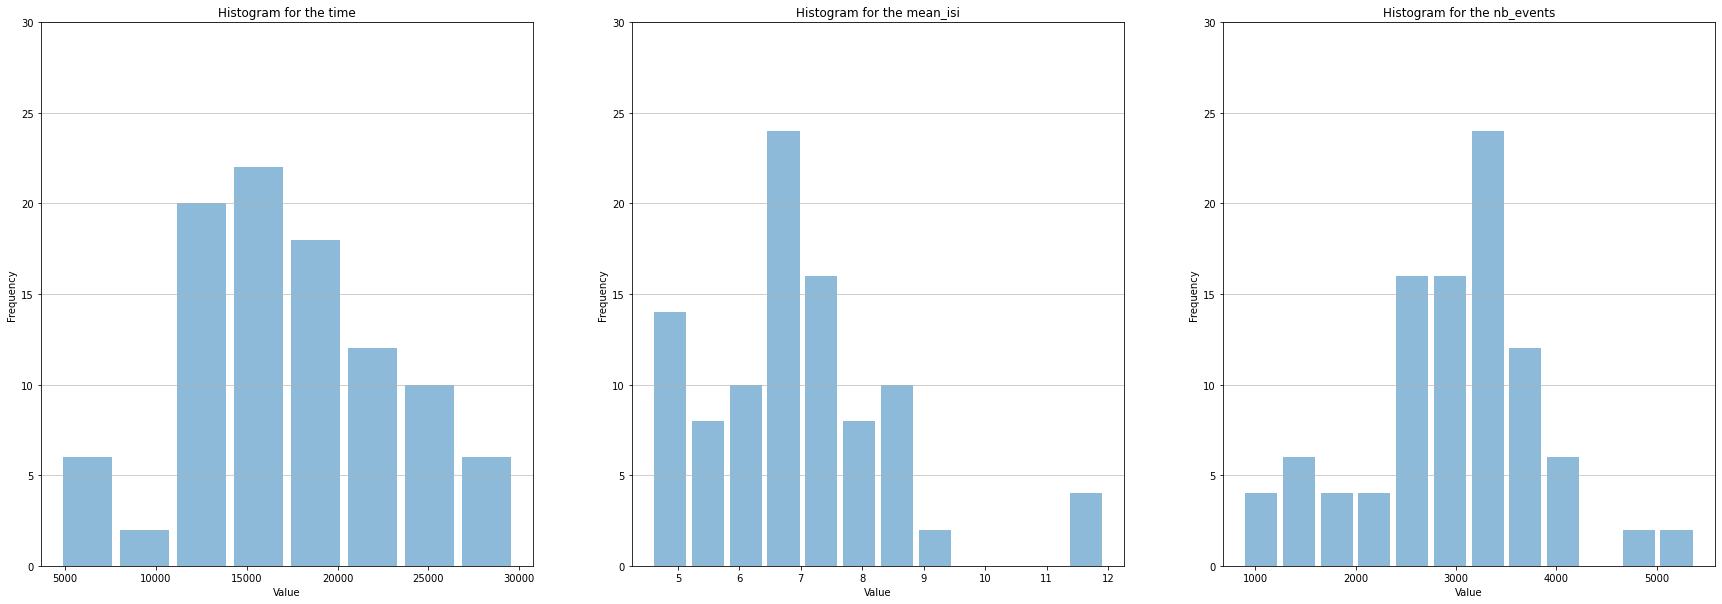

In [102]:
transform = tonic.transforms.NumpyAsType(int)
dataset = tonic.datasets.POKERDVS(save_to='../../Data/', train=True,transform=transform)
loader = get_loader(dataset, shuffle=True)
get_dataset_info(dataset,dataset, properties = ['time', 'mean_isi', 'nb_events']);

In [120]:
class hotslayer(torch.nn.Module):
    def __init__(self, ts_size, n_neurons, bias=False, homeostasis = True):
        super(hotslayer, self).__init__()
        self.synapses = torch.nn.Linear(ts_size, n_neurons, bias=bias)
        torch.nn.init.uniform_(self.synapses.weight, a=0, b=1)
        self.cumhisto = torch.ones([n_neurons])
        self.learning_flag = True
        self.homeo_flag = homeostasis
        
    def homeo_gain(self):
        lambda_homeo = .25
        gain = torch.exp(lambda_homeo*(1-self.cumhisto.size(dim=0)*self.cumhisto/self.cumhisto.sum()))
        return gain

    def forward(self, ts):
        ts = ts.ravel()#/torch.linalg.norm(ts)
        
        beta = self.synapses(ts)#/(torch.linalg.norm(self.synapses.weight.data, dim=1))
        n_star = torch.argmax(beta)
        if self.homeo_flag:
            #print(self.homeo_gain(), beta, (self.homeo_gain()*beta))
            beta_homeo = self.homeo_gain()*beta
            n_star = torch.argmax(beta_homeo)
        
        if self.learning_flag:
            Ck = self.synapses.weight.data[n_star,:]
            alpha = 0.01/(1+self.cumhisto[n_star]/20000)
            self.synapses.weight.data[n_star,:] = Ck + alpha*beta[n_star]*(ts - Ck)#/torch.linalg.norm(self.synapses.weight.data[n_star,:])
            torch.linalg.norm(self.synapses.weight.data[n_star,:])
            # learning rule from Lagorce 2017
            #self.synapses[:,n_star] = Ck + alpha*(TS - simil[closest_proto_idx]*Ck)
            
        self.cumhisto[n_star] += 1
        return n_star

  0%|                                                                                                                                                                                                                                                  | 0/48 [00:00<?, ?it/s]

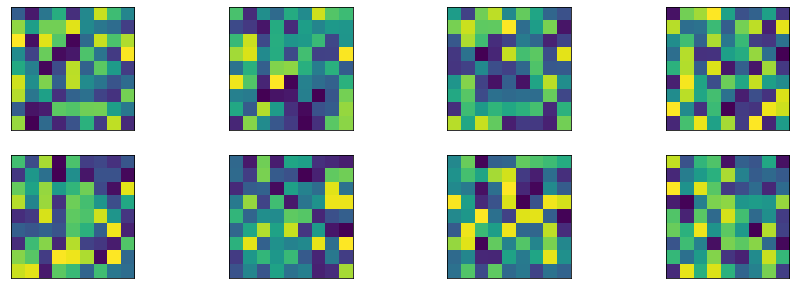

  2%|████▉                                                                                                                                                                                                                                     | 1/48 [00:01<00:48,  1.04s/it]

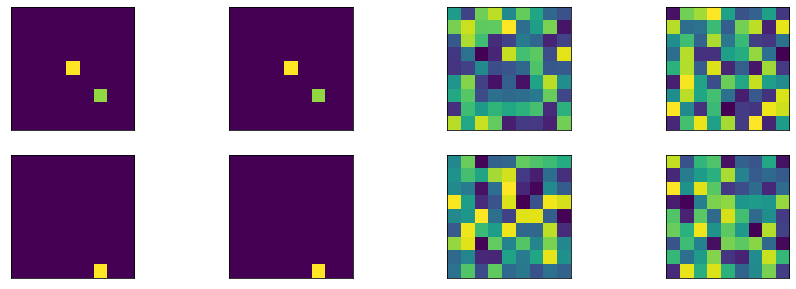

  4%|█████████▊                                                                                                                                                                                                                                | 2/48 [00:01<00:44,  1.03it/s]

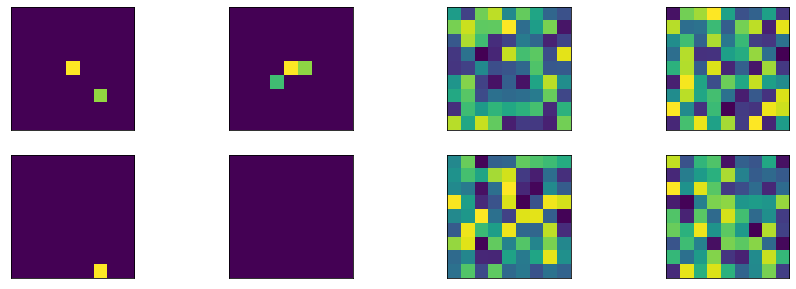

  6%|██████████████▋                                                                                                                                                                                                                           | 3/48 [00:02<00:44,  1.01it/s]

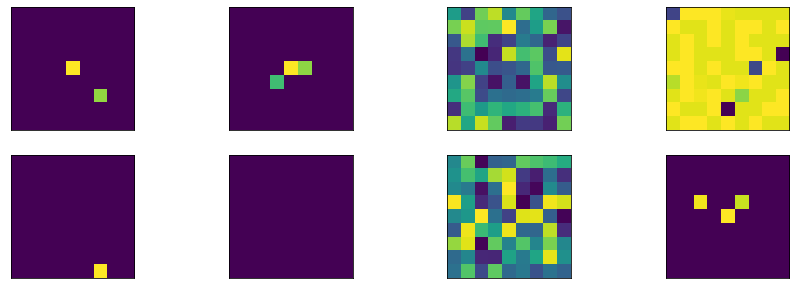

  8%|███████████████████▌                                                                                                                                                                                                                      | 4/48 [00:03<00:43,  1.00it/s]

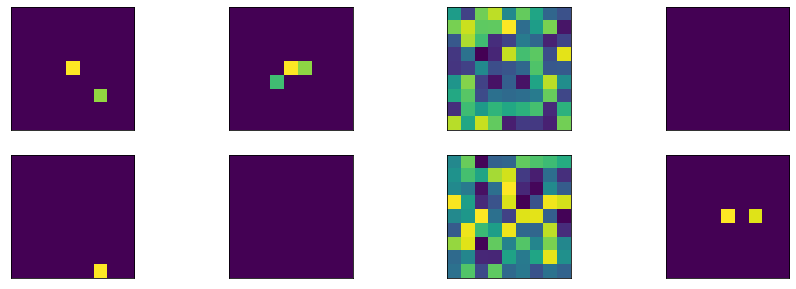

 10%|████████████████████████▍                                                                                                                                                                                                                 | 5/48 [00:04<00:40,  1.05it/s]

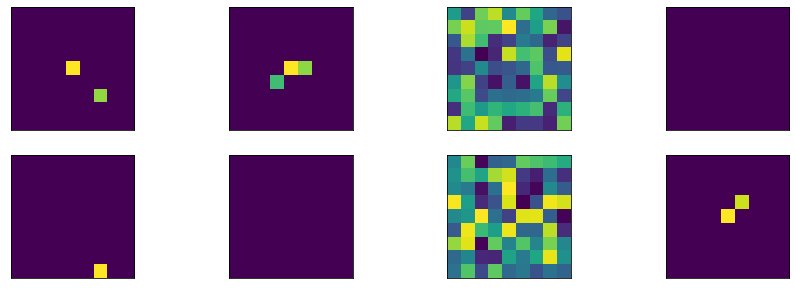

 12%|█████████████████████████████▎                                                                                                                                                                                                            | 6/48 [00:06<00:44,  1.07s/it]

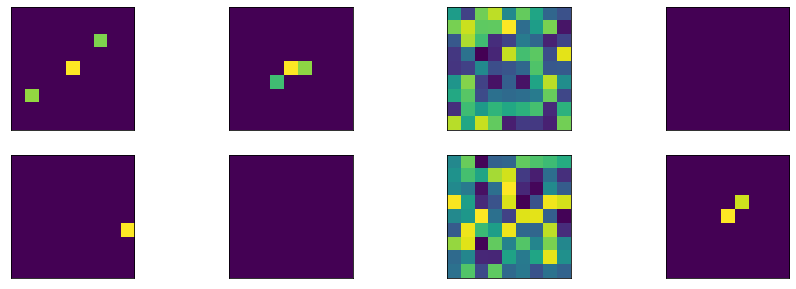

 15%|██████████████████████████████████▏                                                                                                                                                                                                       | 7/48 [00:07<00:43,  1.07s/it]

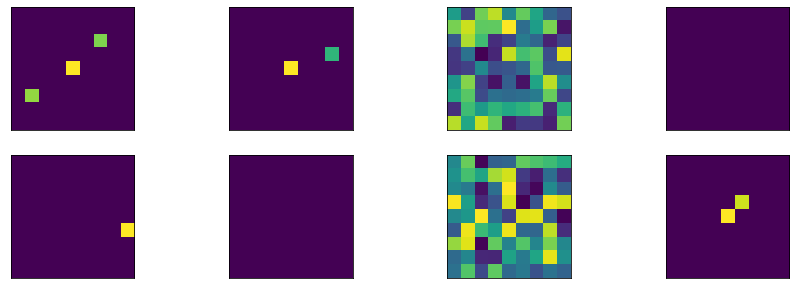

 17%|███████████████████████████████████████                                                                                                                                                                                                   | 8/48 [00:08<00:39,  1.01it/s]

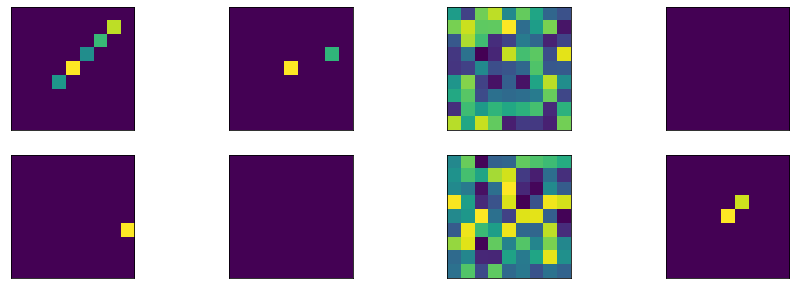

 19%|███████████████████████████████████████████▉                                                                                                                                                                                              | 9/48 [00:08<00:38,  1.02it/s]

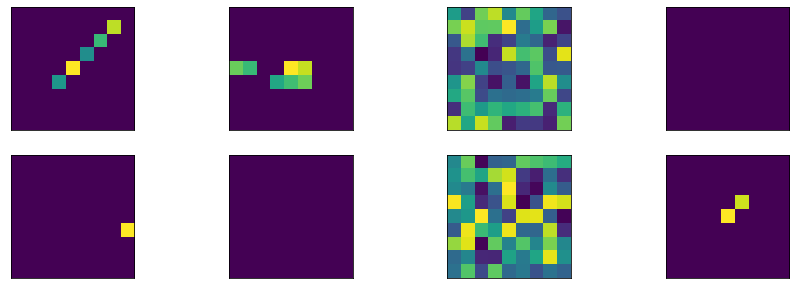

 21%|████████████████████████████████████████████████▌                                                                                                                                                                                        | 10/48 [00:10<00:39,  1.03s/it]

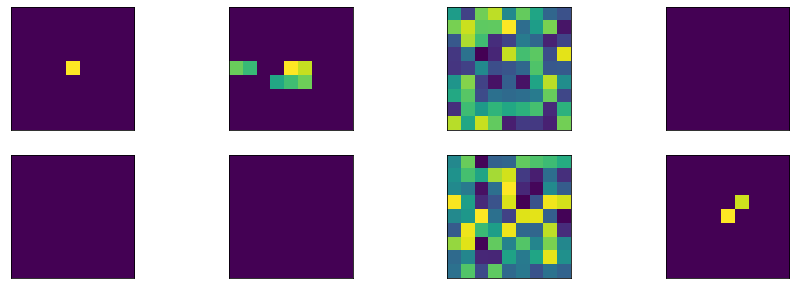

 23%|█████████████████████████████████████████████████████▍                                                                                                                                                                                   | 11/48 [00:11<00:38,  1.05s/it]

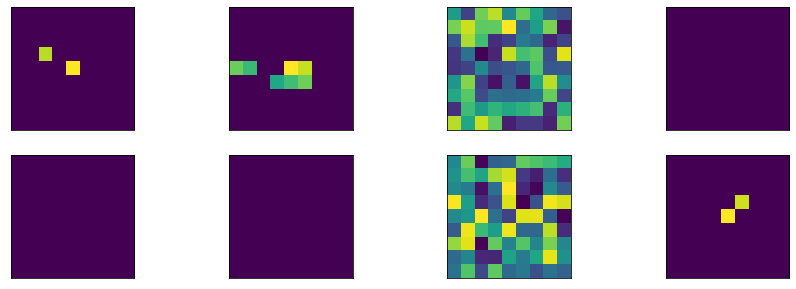

 25%|██████████████████████████████████████████████████████████▎                                                                                                                                                                              | 12/48 [00:12<00:39,  1.09s/it]

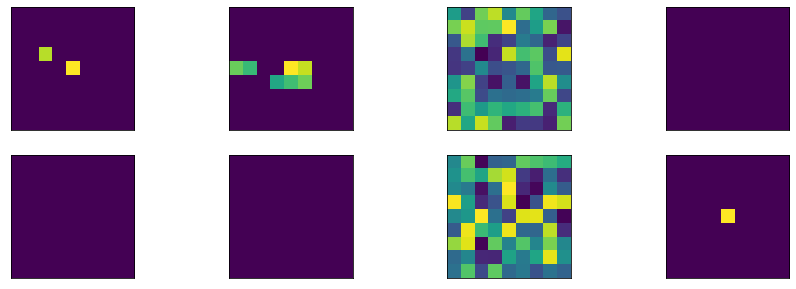

 27%|███████████████████████████████████████████████████████████████                                                                                                                                                                          | 13/48 [00:13<00:33,  1.05it/s]

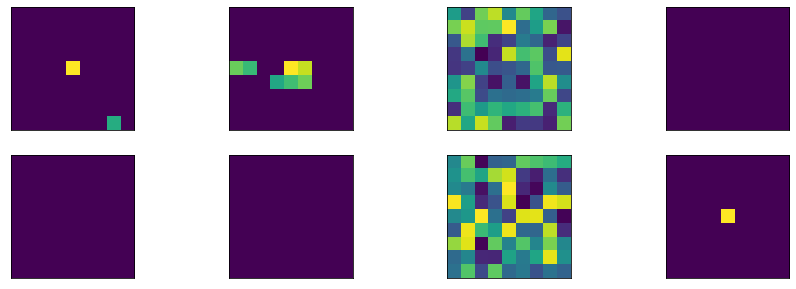

 29%|███████████████████████████████████████████████████████████████████▉                                                                                                                                                                     | 14/48 [00:14<00:32,  1.04it/s]

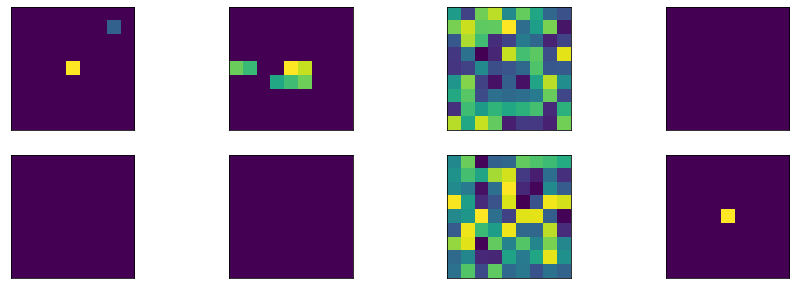

 31%|████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                | 15/48 [00:14<00:27,  1.19it/s]

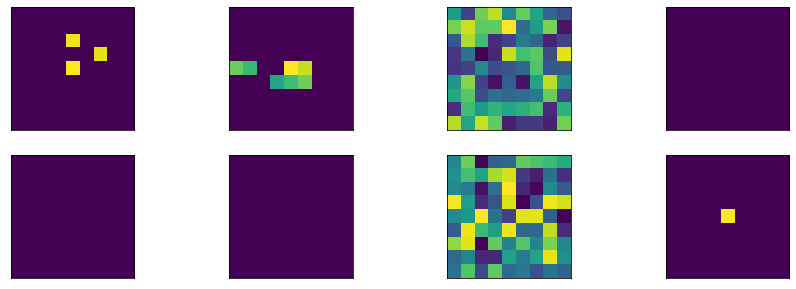

 33%|█████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                           | 16/48 [00:15<00:26,  1.19it/s]

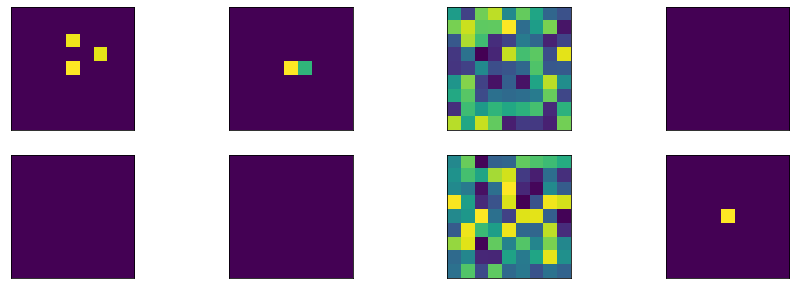

 35%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                      | 17/48 [00:16<00:24,  1.27it/s]

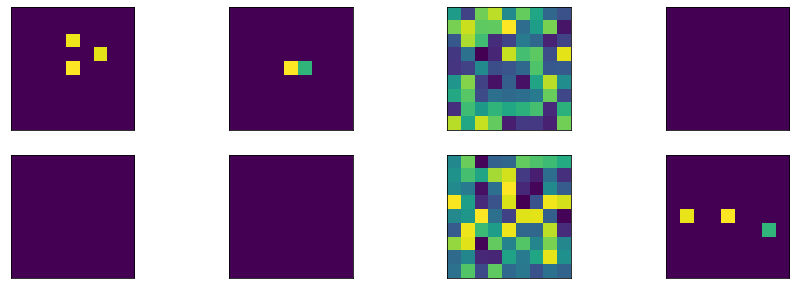

 38%|███████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                 | 18/48 [00:17<00:26,  1.12it/s]

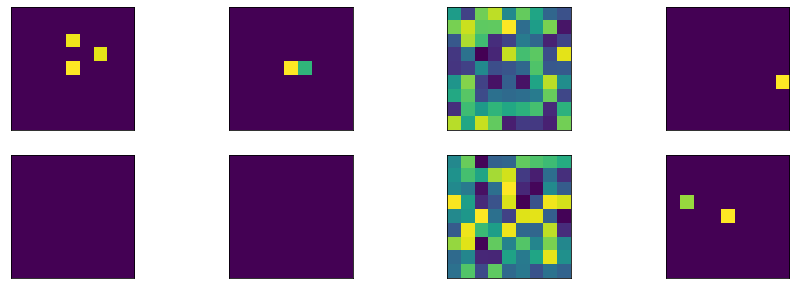

 40%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                            | 19/48 [00:17<00:23,  1.22it/s]

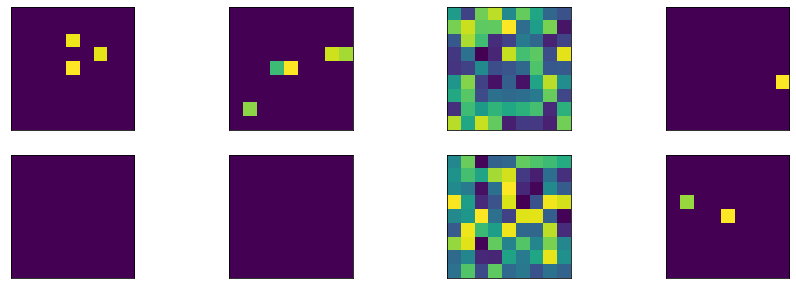

 42%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                        | 20/48 [00:18<00:24,  1.15it/s]

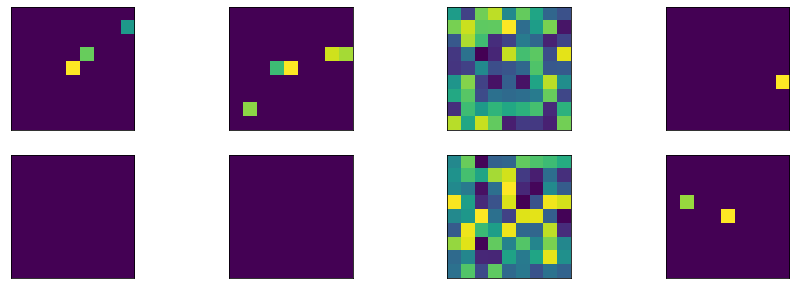

 44%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                   | 21/48 [00:19<00:23,  1.14it/s]

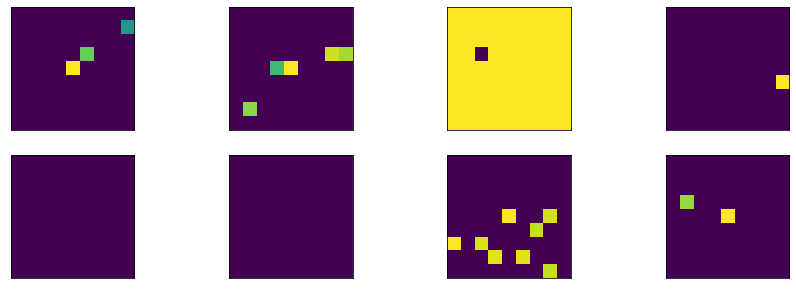

 46%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                              | 22/48 [00:20<00:25,  1.04it/s]

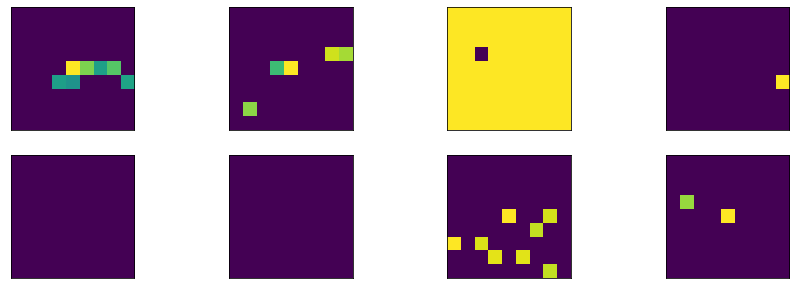

 48%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                         | 23/48 [00:21<00:20,  1.23it/s]

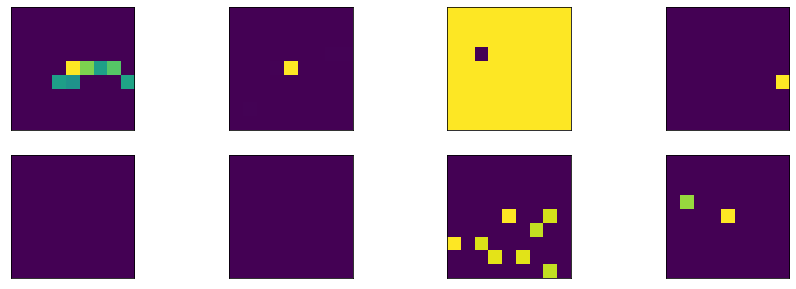

 50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                    | 24/48 [00:21<00:17,  1.35it/s]

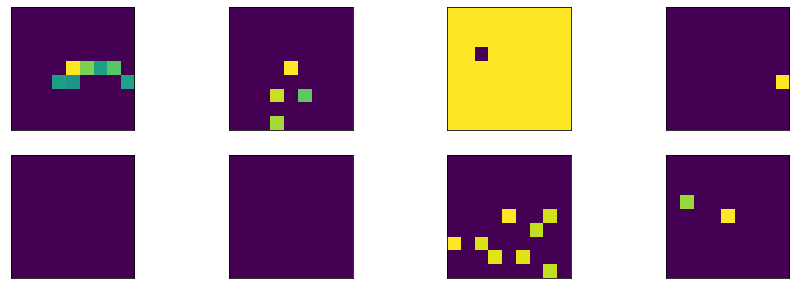

 52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                               | 25/48 [00:23<00:19,  1.16it/s]

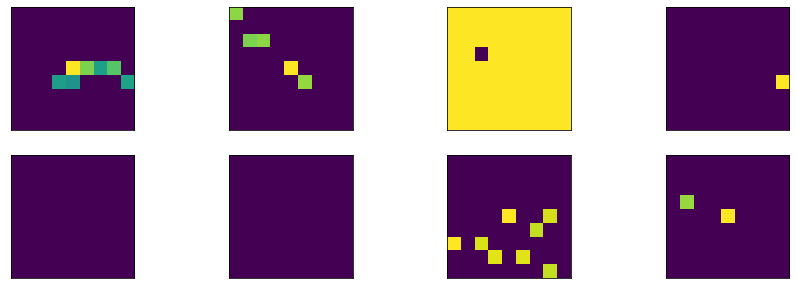

 54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                          | 26/48 [00:24<00:20,  1.09it/s]

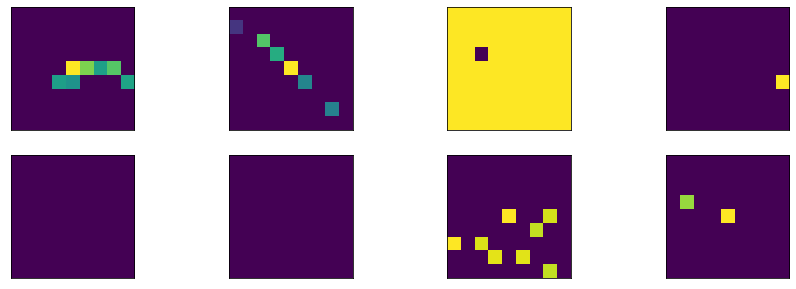

 56%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                      | 27/48 [00:25<00:19,  1.07it/s]

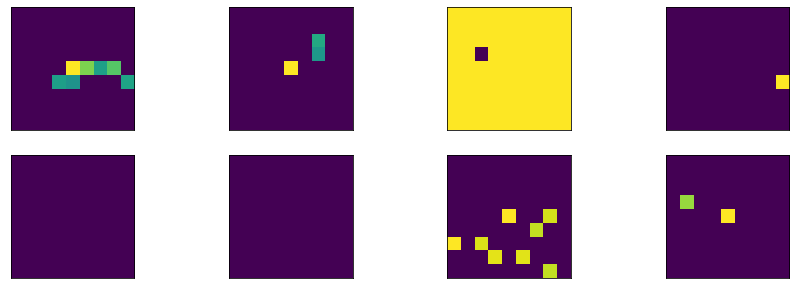

 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                 | 28/48 [00:25<00:17,  1.12it/s]

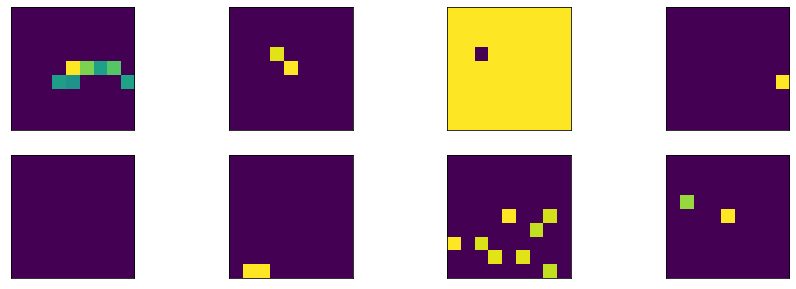

 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                            | 29/48 [00:26<00:16,  1.14it/s]

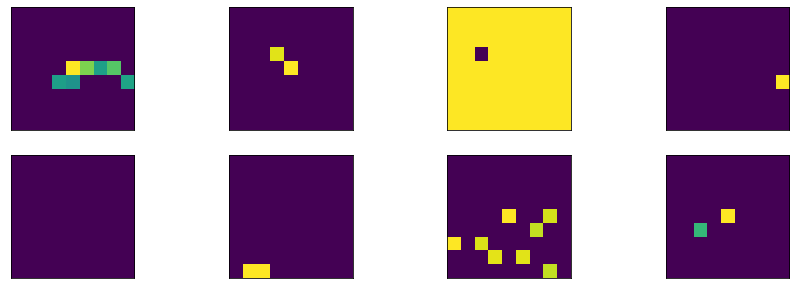

 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 30/48 [00:27<00:16,  1.06it/s]

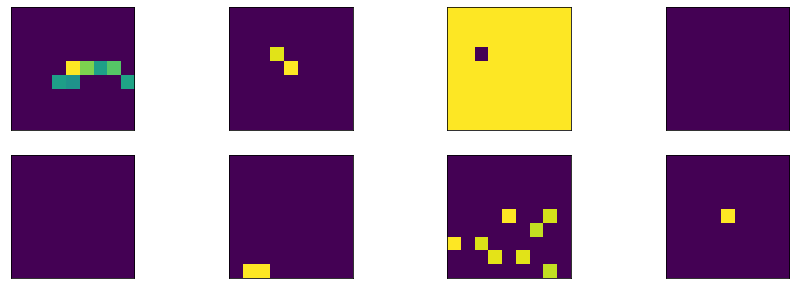

 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 31/48 [00:29<00:17,  1.03s/it]

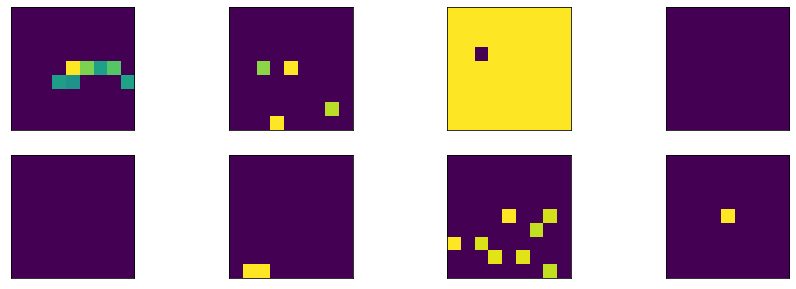

 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 32/48 [00:30<00:17,  1.08s/it]

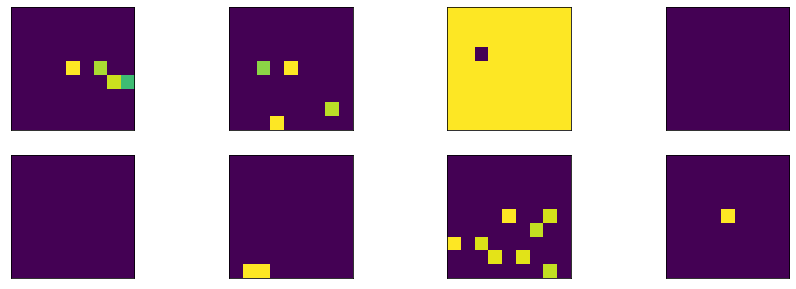

 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 33/48 [00:31<00:15,  1.02s/it]

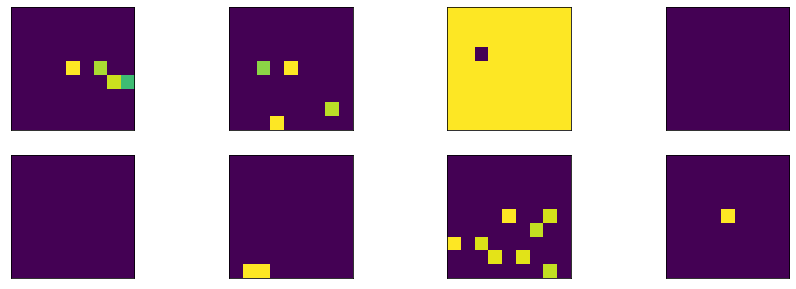

 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 34/48 [00:32<00:16,  1.19s/it]

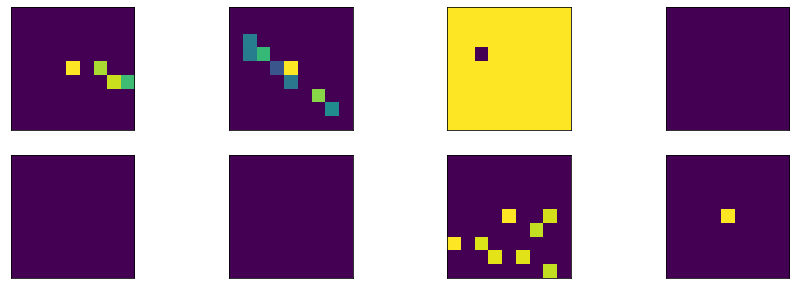

 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 35/48 [00:33<00:14,  1.14s/it]

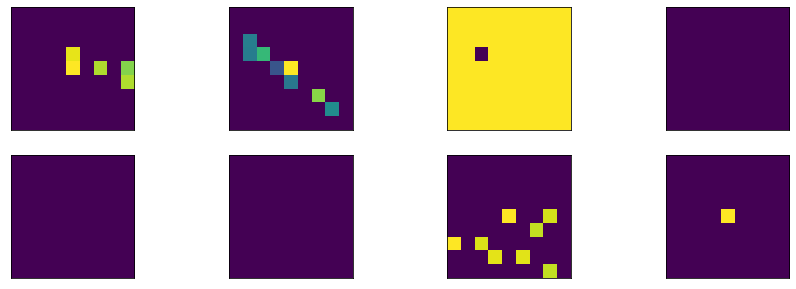

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 36/48 [00:35<00:14,  1.18s/it]

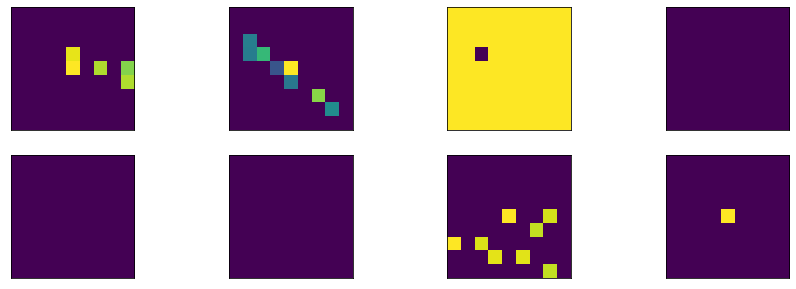

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 37/48 [00:36<00:13,  1.25s/it]

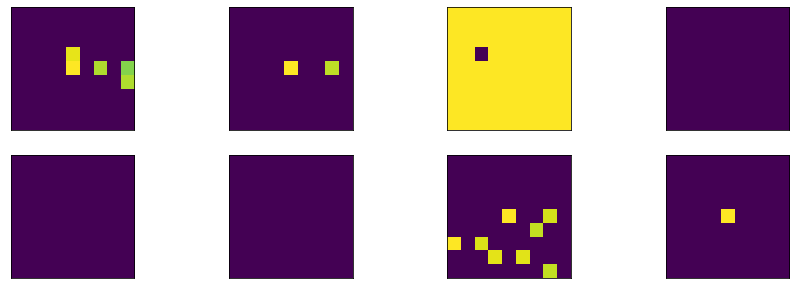

 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 38/48 [00:37<00:10,  1.05s/it]

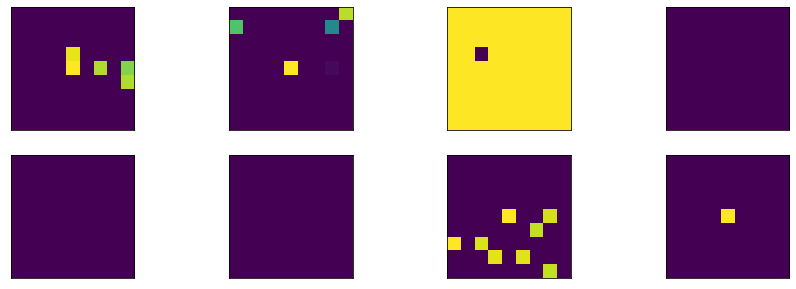

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 39/48 [00:38<00:10,  1.16s/it]

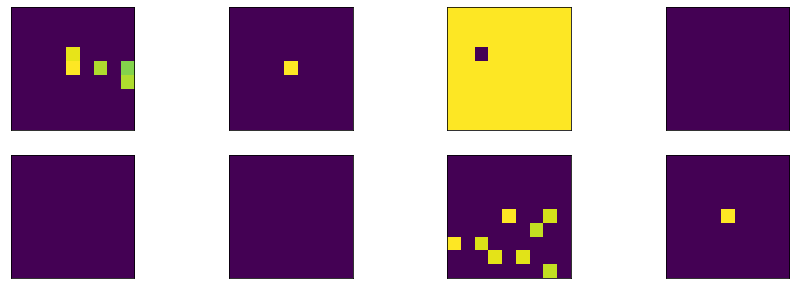

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 40/48 [00:39<00:09,  1.15s/it]

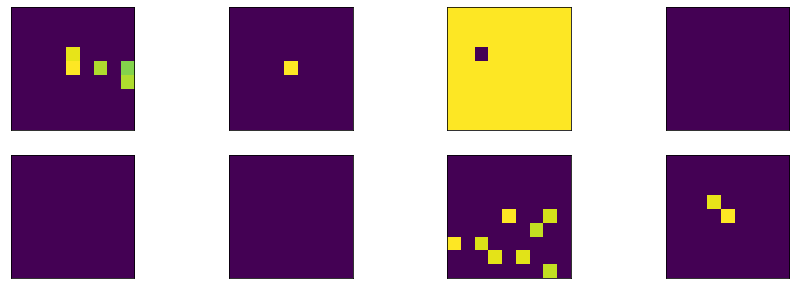

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 41/48 [00:40<00:07,  1.07s/it]

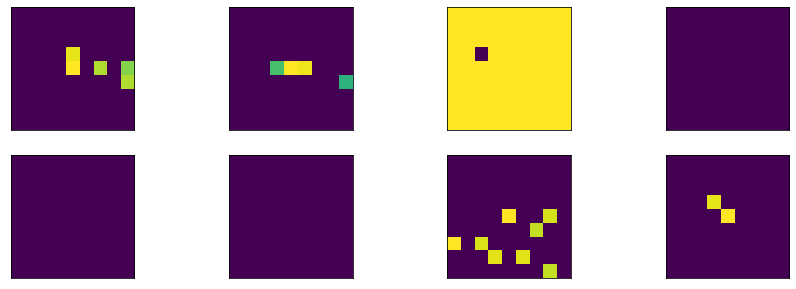

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 42/48 [00:41<00:06,  1.08s/it]

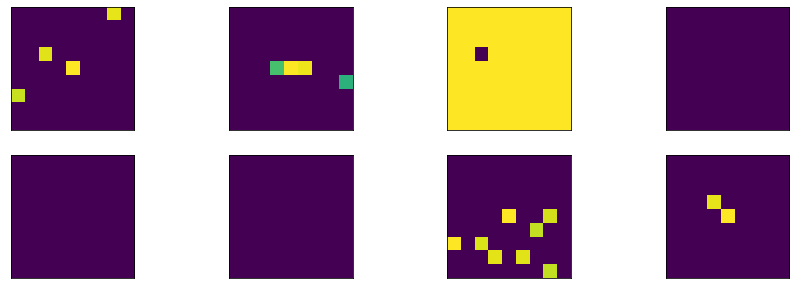

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 43/48 [00:42<00:05,  1.06s/it]

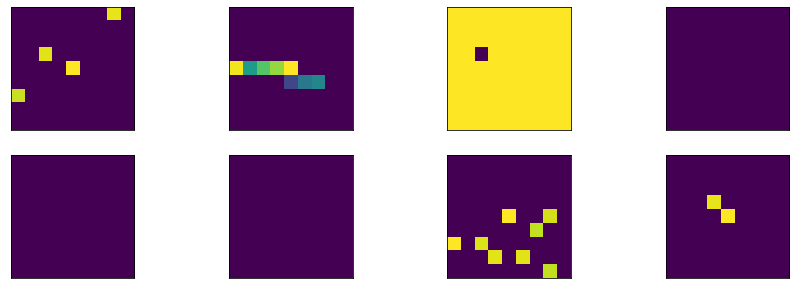

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 44/48 [00:43<00:04,  1.09s/it]

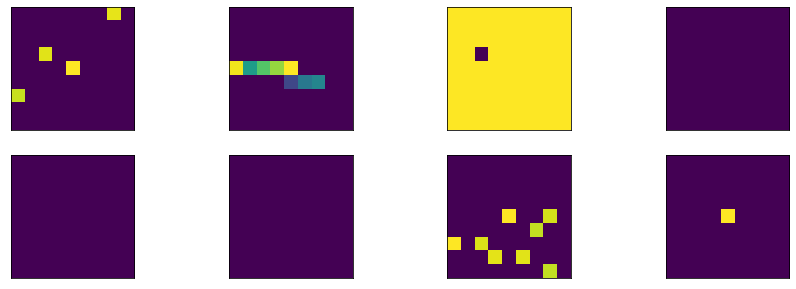

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 45/48 [00:44<00:03,  1.05s/it]

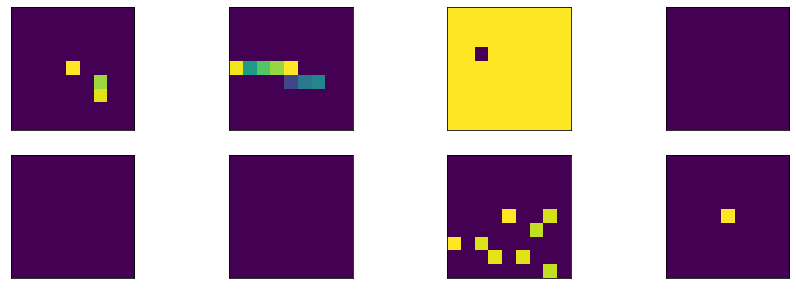

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 46/48 [00:45<00:02,  1.08s/it]

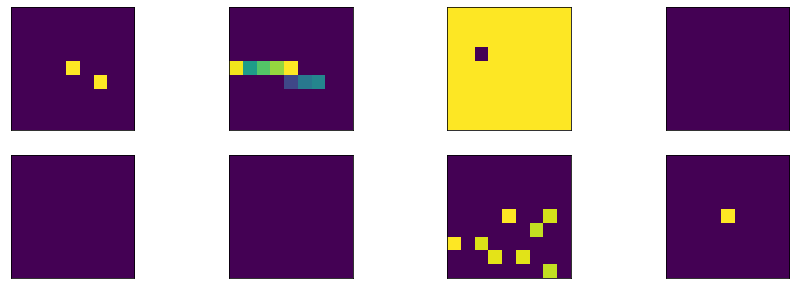

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 47/48 [00:46<00:01,  1.05s/it]

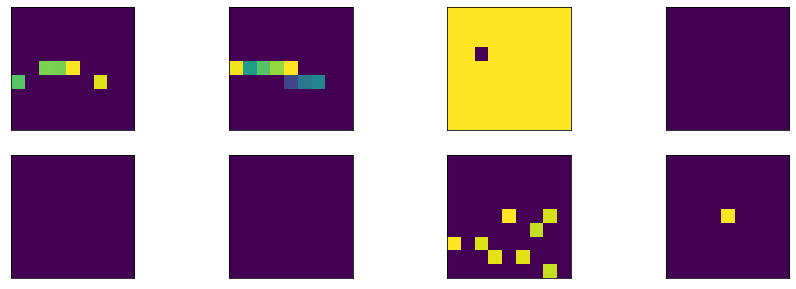

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 48/48 [00:47<00:00,  1.00it/s]


In [121]:
R = 4
n_pola = 2
ts_size = (2*R+1)**2*n_pola
n_neurons = 4
tau = 7e2

with torch.no_grad():
    output_pola = []
    layer = hotslayer(ts_size, n_neurons)
    for events, target in tqdm(loader):
        all_ts = timesurface(events.squeeze(), dataset.sensor_size, dataset.ordering, surface_dimensions=(9,9), tau = tau)
        plotdicpola(layer, 2, 4)
        for iev in range(len(all_ts)):
            n_star = layer(all_ts[10])
            output_pola.append(n_star)

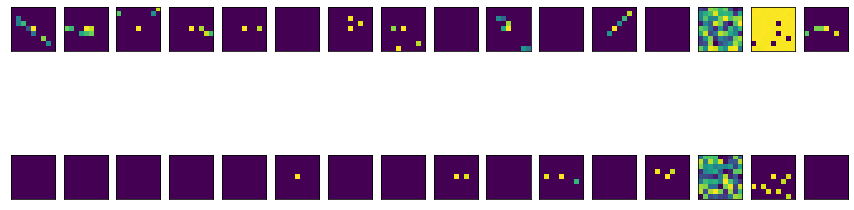

In [106]:
plotdicpola(layer, 2, 4)

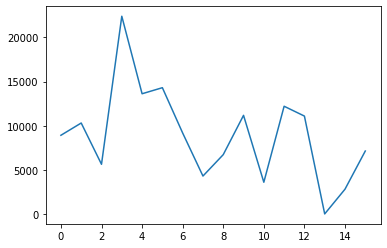

In [109]:
plt.plot(layer.cumhisto)

In [122]:
print(layer.synapses.weight.data)

tensor([[0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081,
         0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081,
         0.0081, 0.0081, 0.2747, 0.1969, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081,
         0.0081, 0.0081, 0.0081, 0.0081, 0.5020, 0.0081, 0.0081, 0.0081, 0.0081,
         0.0081, 0.0081, 0.0082, 0.3518, 0.5841, 0.0081, 0.0081, 0.0081, 0.0081,
         0.0082, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0082, 0.0081, 0.0081,
         0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081,
         0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081,
         0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.3151, 0.2433,
         0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081,
         0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081,
         0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081, 0.0081,
         0.0081, 0.0081, 0.0

In [50]:
import numpy as np
def plotdicpola(layer, pola, R):
    fig = plt.figure(figsize=(15,5))
    kernel = layer.synapses.weight.data.T
    for n in range(len(kernel[0,:])):
        for p in range(pola):
            sub = fig.add_subplot(pola,len(kernel[0,:]),n+len(kernel[0,:])*p+1)
            dico = np.reshape(kernel[p*(2*R+1)**2:(p+1)*(2*R+1)**2,n], [int(np.sqrt(len(kernel)/pola)), int(np.sqrt(len(kernel)/pola))])
            sub.imshow((dico))
            sub.axes.get_xaxis().set_visible(False)
            sub.axes.get_yaxis().set_visible(False)
    plt.show()
    
def plot_weight_distribution(kernels, bins=np.linspace(-.5, .5, 50)):
    K, two, k_T, k_X, k_Y = kernels.shape
    fig, axs = plt.subplots(1,2, figsize=(12, 6))
    for k in range (K):
        pos_kernels = kernels[k, 1, :, :, :]
        neg_kernels = kernels[k, 0, :, :, :]
        axs[0].hist(neg_kernels.ravel(), bins=bins, alpha=.1)
        axs[0].set_xlabel('OFF polarities', fontsize=16)
        axs[1].hist(pos_kernels.ravel(), bins=bins, alpha=.1)
        axs[1].set_xlabel('ON polarities', fontsize=16)
    plt.show()
    
def plot_loss(df_train):
    fig_width, phi = 15, np.sqrt(5)/2 + 1/2
    fig, axs = plt.subplots(figsize=(fig_width, fig_width/phi/2))
    ax = df_train['loss'].plot(lw=2, marker='.', markersize=10)
    ax.set_xlabel("Epoch", size=18)
    ax.set_ylabel("Loss", size=18)
    ax.spines['left'].set_position(('axes', -0.01))
    ax.grid(which='both')
    for side in ['top', 'right']: ax.spines[side].set_visible(False)
    ax.set_ylim(0.);
    plt.show()

In [45]:
np.sqrt(35)

5.916079783099616